In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
data = pd.read_csv('../qc/fd_pet_motion.csv')
data.drop(columns="Unnamed: 0", inplace=True)
unmask = pd.read_csv('../info/unmask.txt', delimiter=' ', dtype='str')


In [143]:
mean=data.mean(axis=0)
max=data.max(axis=0)
mt2 = data > 2
mt2 = mt2.sum(axis=0)

In [144]:
active = unmask.subject + '-' + unmask.active_session
sham = unmask.subject + '-' + unmask.sham_session

data_active = data[active]
data_sham = data[sham]


In [145]:
dict_plot = {'subject':  unmask.subject, 'mean_active': data_active.mean(axis=0).to_list(), 'mean_sham': data_sham.mean(axis=0).to_list(),
             'max_active': data_active.max(axis=0).to_list(), 'max_sham': data_sham.max(axis=0).to_list()}
df_plot = pd.DataFrame(dict_plot)

df_plot_long = df_plot.melt(id_vars='subject', value_vars=['mean_active', 'mean_sham', 'max_active', 'max_sham'], 
                            var_name='condition', value_name='value')


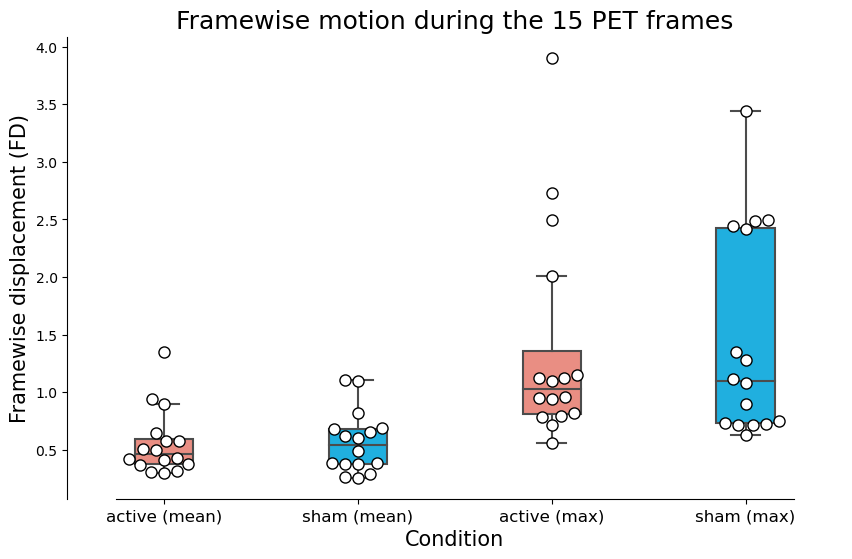

In [146]:
plt.figure(figsize=(10, 6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

palette = ['salmon', 'deepskyblue', 'salmon', 'deepskyblue']
p=sns.boxplot(data=df_plot_long, x='condition', y='value', palette=palette, width= 0.3, fliersize=0)
sns.swarmplot(data=df_plot_long, x='condition', y='value', size=8, linewidth=1,edgecolor='black', color='white')

plt.xlabel('Condition', fontsize=15)  # Label for x-axis
p.set_xticks(range(4), labels=['active (mean)', 'sham (mean)', 'active (max)', 'sham (max)'], fontsize=12)
p.spines['bottom'].set_bounds(-0.25, 3.25)
plt.ylabel('Framewise displacement (FD)', fontsize=15)  # Label for y-axis
plt.title('Framewise motion during the PET frames', fontsize=18)  # Title of the plot

plt.show();
